In [1]:
#Import Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler
from dateutil import parser
import time
%matplotlib inline
#%matplotlib qt5 # this will show plotting in new window and inline show in the same place
sns.set()

Using TensorFlow backend.


In [2]:
#Set the working Directory
os.chdir("C:/Users/Aurangzeb Alam/Desktop/Shaquib Dataset/Classification")

In [3]:
#Check the working directory
os.getcwd()

'C:\\Users\\Aurangzeb Alam\\Desktop\\Shaquib Dataset\\Classification'

In [4]:
#Load the Data
Dataset = pd.read_csv("appdata10.csv", sep=",")

# Exploratory Data Analysis

In [5]:
#Head of the Data
Dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [6]:
Dataset.drop("first_open",axis=1,inplace=True)
Dataset.drop("screen_list",axis=1,inplace=True)

In [7]:
#Shape
Dataset.shape

(50000, 10)

In [8]:
#Info
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
user                    50000 non-null int64
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(2)
memory usage: 3.8+ MB


In [9]:
Dataset["hour"] = Dataset.hour.str.slice(1,3).astype(int)

In [10]:
#Data types
Dataset.dtypes

user                     int64
dayofweek                int64
hour                     int32
age                      int64
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [11]:
#Statistical Description
Dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#Columns name
Dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'enrolled_date', 'liked'],
      dtype='object')

In [13]:
#Numerical columns
numerical_columns = Dataset.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['user',
 'dayofweek',
 'hour',
 'age',
 'numscreens',
 'minigame',
 'used_premium_feature',
 'enrolled',
 'liked']

# Missing Value Analysis

In [14]:
missing_value = pd.DataFrame(Dataset.isnull().sum())
missing_value

,0
user,0
dayofweek,0
hour,0
age,0
numscreens,0
minigame,0
used_premium_feature,0
enrolled,0
enrolled_date,18926
liked,0


In [15]:
#Total missing values
Dataset.isnull().sum().sum()

18926

In [16]:
Dataset.drop("enrolled_date",axis=1,inplace=True)

# Outliers

<Figure size 1440x1440 with 0 Axes>

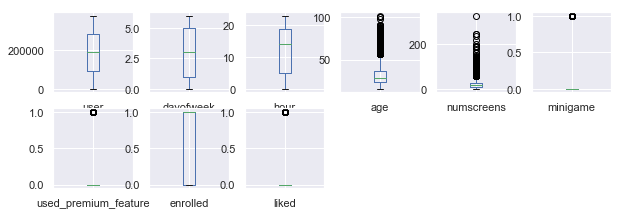

In [17]:
#Outliers plotting
plt.figure(figsize=(20,20))
Dataset.plot(kind="box",subplots=True,layout=(3,6), figsize=(10,5))
plt.show()

In [18]:
for i in numerical_columns:
    print(i)
    q75,q25=np.percentile(Dataset[i],[75,25])
    iqr = q75-q25
    min = q25-(iqr*1.5)
    print(min)
    max = q75+(iqr*1.5)
    print(max)
    Dataset.loc[Dataset[i]<min,i] = np.nan
    Dataset.loc[Dataset[i]>max,i] = np.nan

user
-186159.5
559670.5
dayofweek
-5.0
11.0
hour
-16.0
40.0
age
4.5
56.5
numscreens
-17.0
55.0
minigame
0.0
0.0
used_premium_feature
0.0
0.0
enrolled
-1.5
2.5
liked
0.0
0.0


In [19]:
Dataset.isnull().sum().sum()

25726

In [20]:
Dataset = Dataset.fillna(Dataset.mean())

In [21]:
Dataset.isnull().sum().sum()

0

# Feature Selection

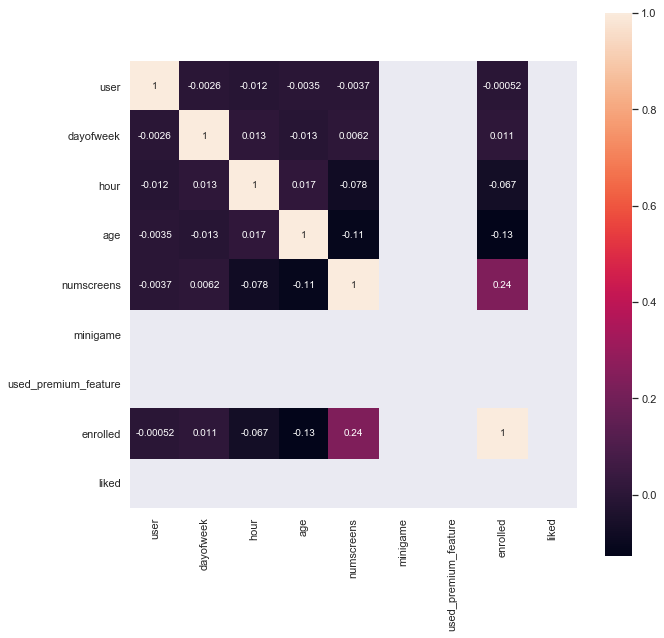

In [22]:
#Feature Selection
corr = Dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, square=True)

In [23]:
#Detect and delete correlated columns
target_features = abs(corr["enrolled"])
relevant_features = target_features[target_features<0.75]
relevant_features_columns = relevant_features[:][:]
relevant_features_columns

user          0.000519
dayofweek     0.011326
hour          0.066694
age           0.127446
numscreens    0.237400
Name: enrolled, dtype: float64

In [24]:
#Split Data into independent and dependent
X = Dataset[["user","dayofweek","hour","numscreens"]]
y = Dataset["enrolled"]

In [26]:
#Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

# Feature Scaling

In [27]:
#Scale the Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Model

In [28]:
#Import Logistic Regression and initiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train,y_train)
prediction = Logistic_Regression.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
#Accuracy metrics
from sklearn import metrics
print("accuracy_score",metrics.accuracy_score(prediction,y_test))

accuracy_score 0.6574666666666666
